In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn 
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.ticker as mtick
pd.set_option('display.max_row',None)
pd.set_option('display.max_column',None)
%matplotlib inline 

# Understanding The Data 

In [2]:
data = pd.read_csv("C:/Users/AMIT KALAL/ProdigyInfoTech Tasks/IBM Sales Data.csv")

In [3]:
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
8     7892-POOKP  Female              0     Yes         No      28   
9     6388-TABGU    Male              0      No        Yes      62   
10    9763-GRSKD    Male              0     Yes        Yes      13   
11    7469-LKBCI    Male              0      No         No      16   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
16    8191-XWSZG  Female              0      No         No      52   
17    9959-WOFKT    Male              0      No        Yes      71   
18    4190-MFLUW  Female              0     Yes        Yes      10   
19    4183-MYFRB  Female              0      No         No      21   
20    8779-QRDMV    Male              1      No         No       1   
21    1680-VDCWW    Male              0     Yes         No      12   
22    1066-JKSGK    Male              0      No         No       1   
23    3638-WEABW  Female              0     Yes         No      58   
24    6322-HRPFA    Male              0     Yes        Yes      49   
25    6865-JZNKO  Female              0      No         No      30   
26    6467-CHFZW    Male              0     Yes        Yes      47   
27    8665-UTDHZ    Male              0     Yes        Yes       1   
28    5248-YGIJN    Male              0     Yes         No      72   
29    8773-HHUOZ  Female              0      No        Yes      17   
30    3841-NFECX  Female              1     Yes         No      71   
31    4929-XIHVW    Male              1     Yes         No       2   
32    6827-IEAUQ  Female              0     Yes        Yes      27   
33    7310-EGVHZ    Male              0      No         No       1   
34    3413-BMNZE    Male              1      No         No       1   
35    6234-RAAPL  Female              0     Yes        Yes      72   
36    6047-YHPVI    Male              0      No         No       5   
37    6572-ADKRS  Female              0      No         No      46   
38    5380-WJKOV    Male              0      No         No      34   
39    8168-UQWWF  Female              0      No         No      11   
40    8865-TNMNX    Male              0     Yes        Yes      10   
41    9489-DEDVP  Female              0     Yes        Yes      70   
42    9867-JCZSP  Female              0     Yes        Yes      17   
43    4671-VJLCL  Female              0      No         No      63   
44    4080-IIARD  Female              0     Yes         No      13   
45    3714-NTNFO  Female              0      No         No      49   
46    5948-UJZLF    Male              0      No         No       2   
47    7760-OYPDY  Female              0      No         No       2   
48    7639-LIAYI    Male              0      No         No      52   
49    2954-PIBKO  Female              0     Yes        Yes      69   
50    8012-SOUDQ  Female              1      No         No      43   
51    9420-LOJKX  Female              0      No         No      15   
52    6575-SUVOI  Female              1     Yes         No      25   
53    7495-OOKFY  Female              1     Yes         No       8   
54    4667-QONEA  Female              1     Yes        Yes      60   
55    1658-BYGOY    Male              1      No         No      18   
56    8769-KKTPH

In [4]:
data['SeniorCitizen'].sum()

1142

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data['PaymentMethod'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: PaymentMethod
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [7]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [8]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data['TotalCharges'].isnull().sum()

11

In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
Unique_value = data['PaymentMethod'].unique()

In [13]:
Unique_value

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
Unique_valu = data['MultipleLines'].unique()

In [15]:
Unique_valu

array(['No phone service', 'No', 'Yes'], dtype=object)

In [16]:
Unique_val = data['Contract'].unique()

In [17]:
Unique_valu

array(['No phone service', 'No', 'Yes'], dtype=object)

In [18]:
data.describe(include='all')

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
count          7043          7043            7043           7043         7043   
unique            2             3               3              3            3   
top             Yes            No     Fiber optic             No           No   
freq           6361          3390            3096           3498         3088   
mean            NaN           NaN             NaN            NaN          NaN   
std             NaN           NaN             NaN            NaN          NaN   
min             NaN           NaN             NaN            NaN          NaN   
25%             NaN           NaN             NaN            NaN          NaN   
50%             NaN           NaN             NaN            NaN          NaN   
75%             NaN           NaN             NaN            NaN          NaN   
max             NaN           NaN             NaN            NaN          NaN   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
count             7043             7043              7043     7043.000000   
unique               3                2                 4             NaN   
top     Month-to-month              Yes  Electronic check             NaN   
freq              3875             4171              2365             NaN   
mean               NaN              NaN               NaN       64.761692   
std                NaN              NaN               NaN       30.090047   
min                NaN              NaN               NaN       18.250000   
25%                NaN              NaN               NaN       35.500000   
50%                NaN              NaN               NaN       70.350000   
75%                NaN              NaN               NaN       89.850000   
max                NaN              NaN               NaN      118.750000   

        TotalCharges Churn  
count    7032.000000  7043  
unique           NaN     2  
top              NaN    No  
freq             NaN  5174  
mean     2283.300441   NaN  
std      2266.771362   NaN  
min        18.800000   NaN  
25%       401.450000   NaN  
50%      1397.475000   NaN  
75%      3794.737500   NaN  
max      8684.800000   NaN

In [19]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

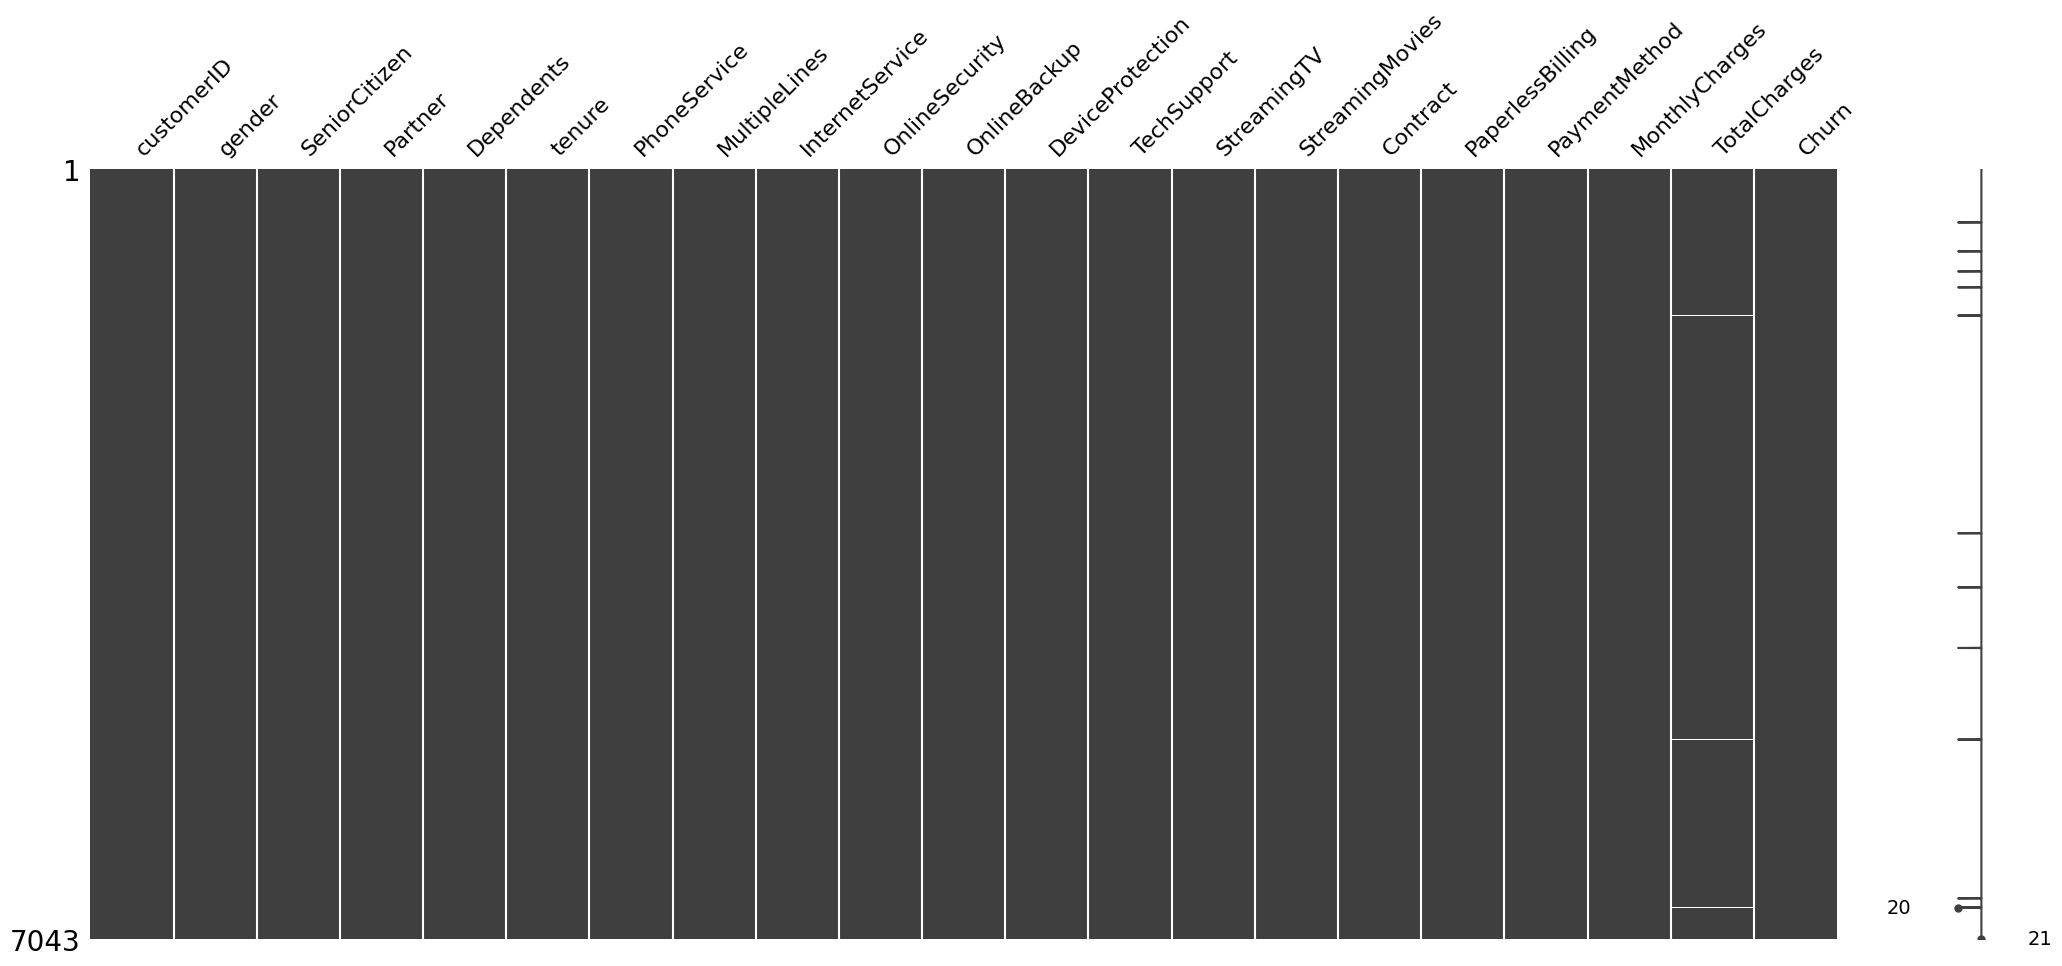

In [20]:
## Visualize missing values as a matrix
msno.matrix(data);

# Manipulation of Data

In [21]:
# Removing missing Values
data.dropna(inplace = True)

In [22]:
# Removing Customer ID column
df=data.drop(['customerID'] , axis = 1).copy()

In [23]:
# Change all the column from catergoroical to numerical
object_colums = df.select_dtypes(include=['object']).columns
for col in object_colums:
    le = LabelEncoder()
    df[col]=le.fit_transform(df[col])


In [74]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [24]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

After transforming all categorical data into numerical lets find out if there is any outlier that affect our visualisation 

gender                 Axes(0.125,0.786098;0.168478x0.0939024)
SeniorCitizen       Axes(0.327174,0.786098;0.168478x0.0939024)
Partner             Axes(0.529348,0.786098;0.168478x0.0939024)
Dependents          Axes(0.731522,0.786098;0.168478x0.0939024)
tenure                 Axes(0.125,0.673415;0.168478x0.0939024)
PhoneService        Axes(0.327174,0.673415;0.168478x0.0939024)
MultipleLines       Axes(0.529348,0.673415;0.168478x0.0939024)
InternetService     Axes(0.731522,0.673415;0.168478x0.0939024)
OnlineSecurity         Axes(0.125,0.560732;0.168478x0.0939024)
OnlineBackup        Axes(0.327174,0.560732;0.168478x0.0939024)
DeviceProtection    Axes(0.529348,0.560732;0.168478x0.0939024)
TechSupport         Axes(0.731522,0.560732;0.168478x0.0939024)
StreamingTV            Axes(0.125,0.448049;0.168478x0.0939024)
StreamingMovies     Axes(0.327174,0.448049;0.168478x0.0939024)
Contract            Axes(0.529348,0.448049;0.168478x0.0939024)
PaperlessBilling    Axes(0.731522,0.448049;0.168478x0.0

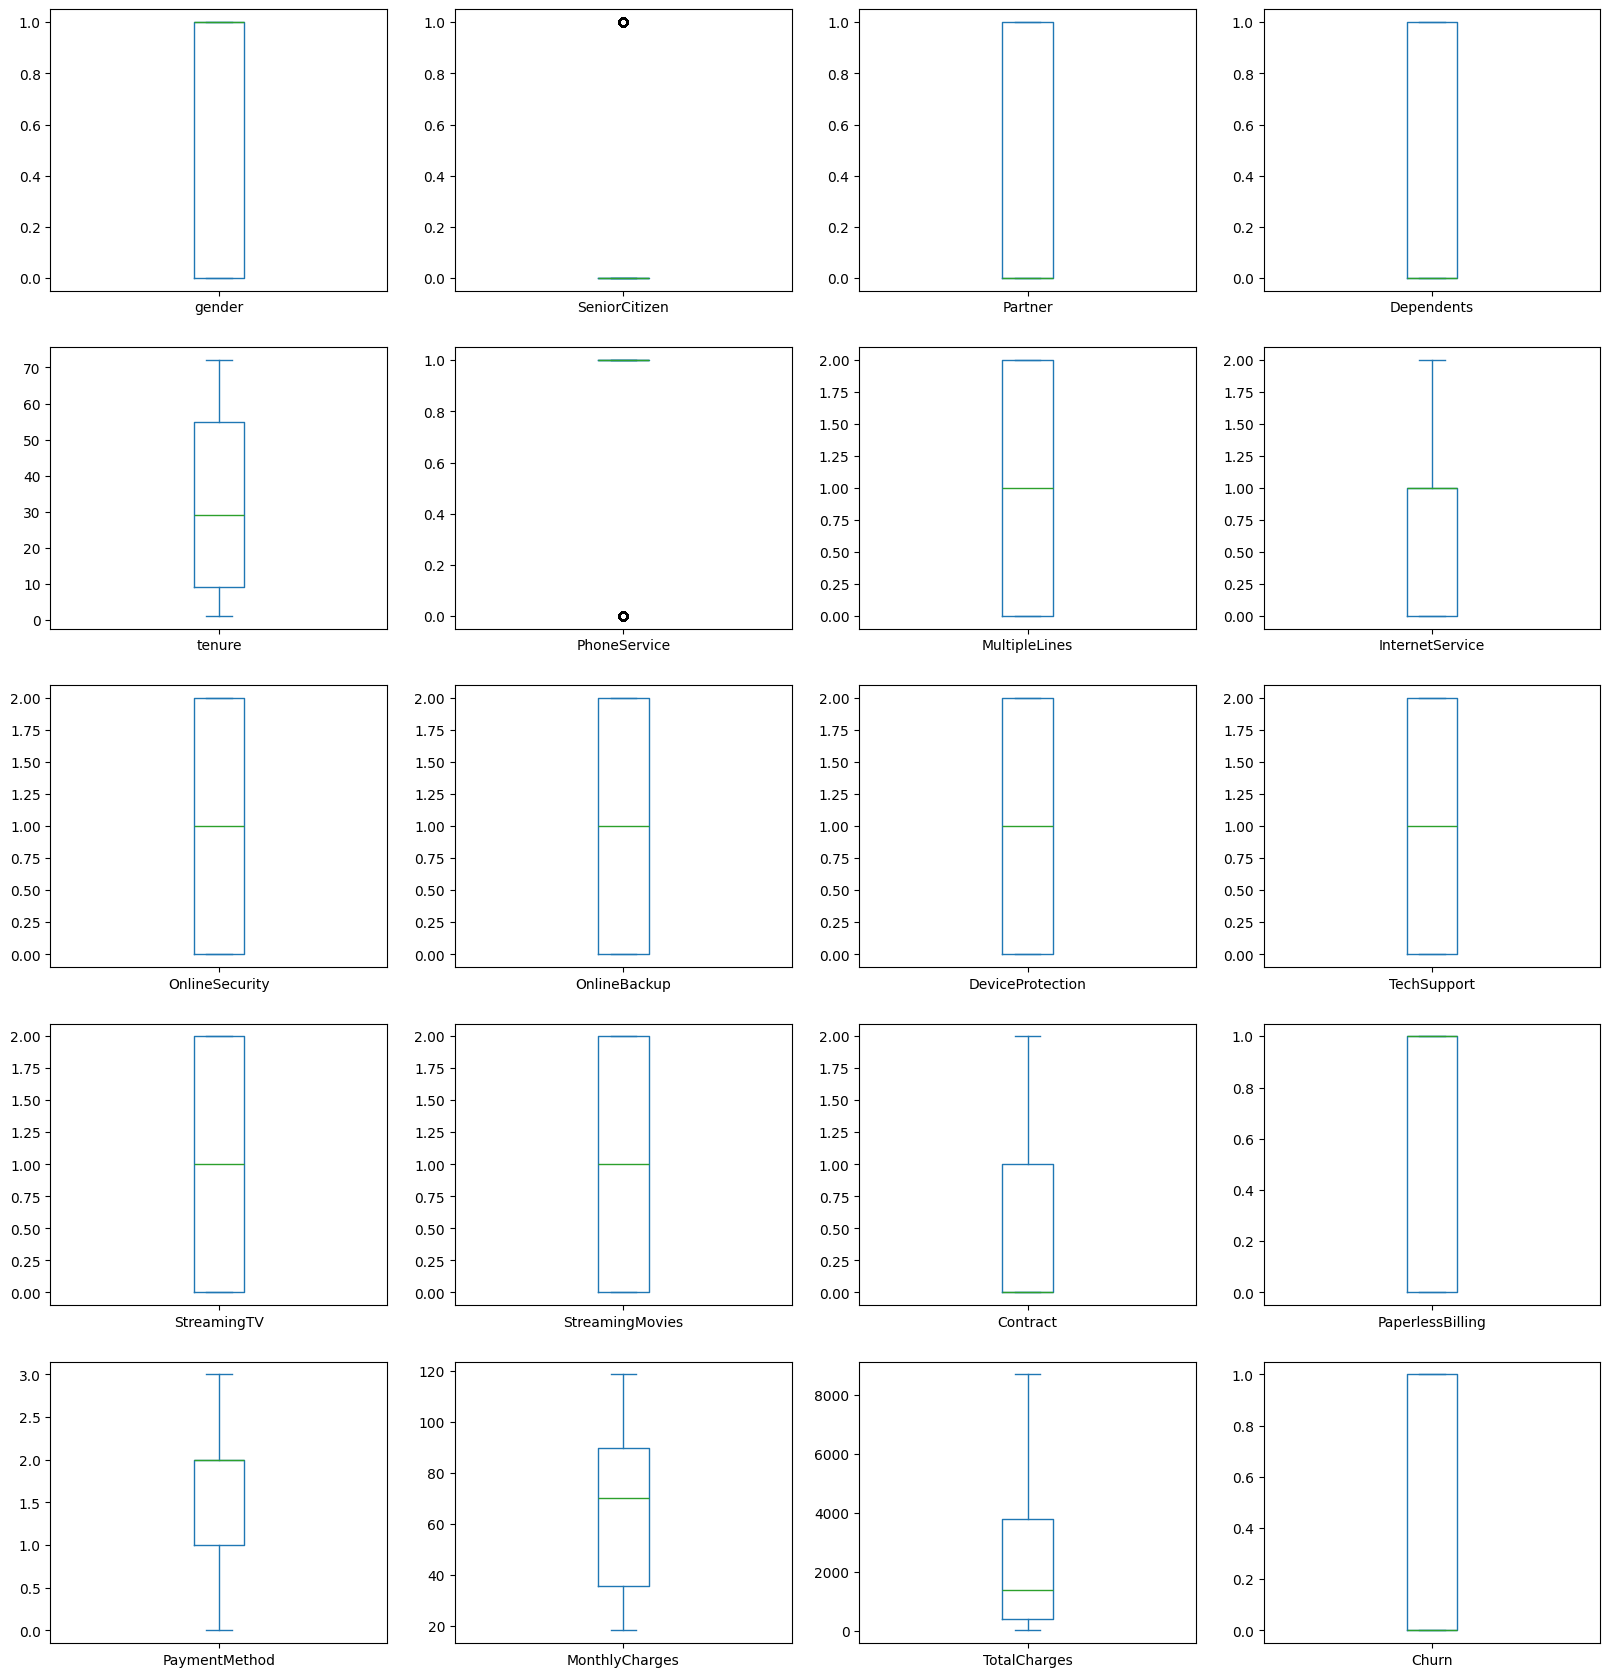

In [25]:
# for finding an outlier I'll use boxplot all for all the columns at once
df.plot(kind='box',subplots = True , layout=(7,4),figsize=(20,30))

In [26]:
qi=df['PhoneService'].quantile(0.99)
qj=df['SeniorCitizen'].quantile(0.99)

In [27]:
# We don't see any over threshold, lets try another way
print(qi,qj)

1.0 1.0


In [28]:

df[df['SeniorCitizen']>qj]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

I think the outlier would not affect any visualization part.
Now lets find correlation between columns , we'll see that any of the Telecom service are correlated to the churn 

<Axes: >

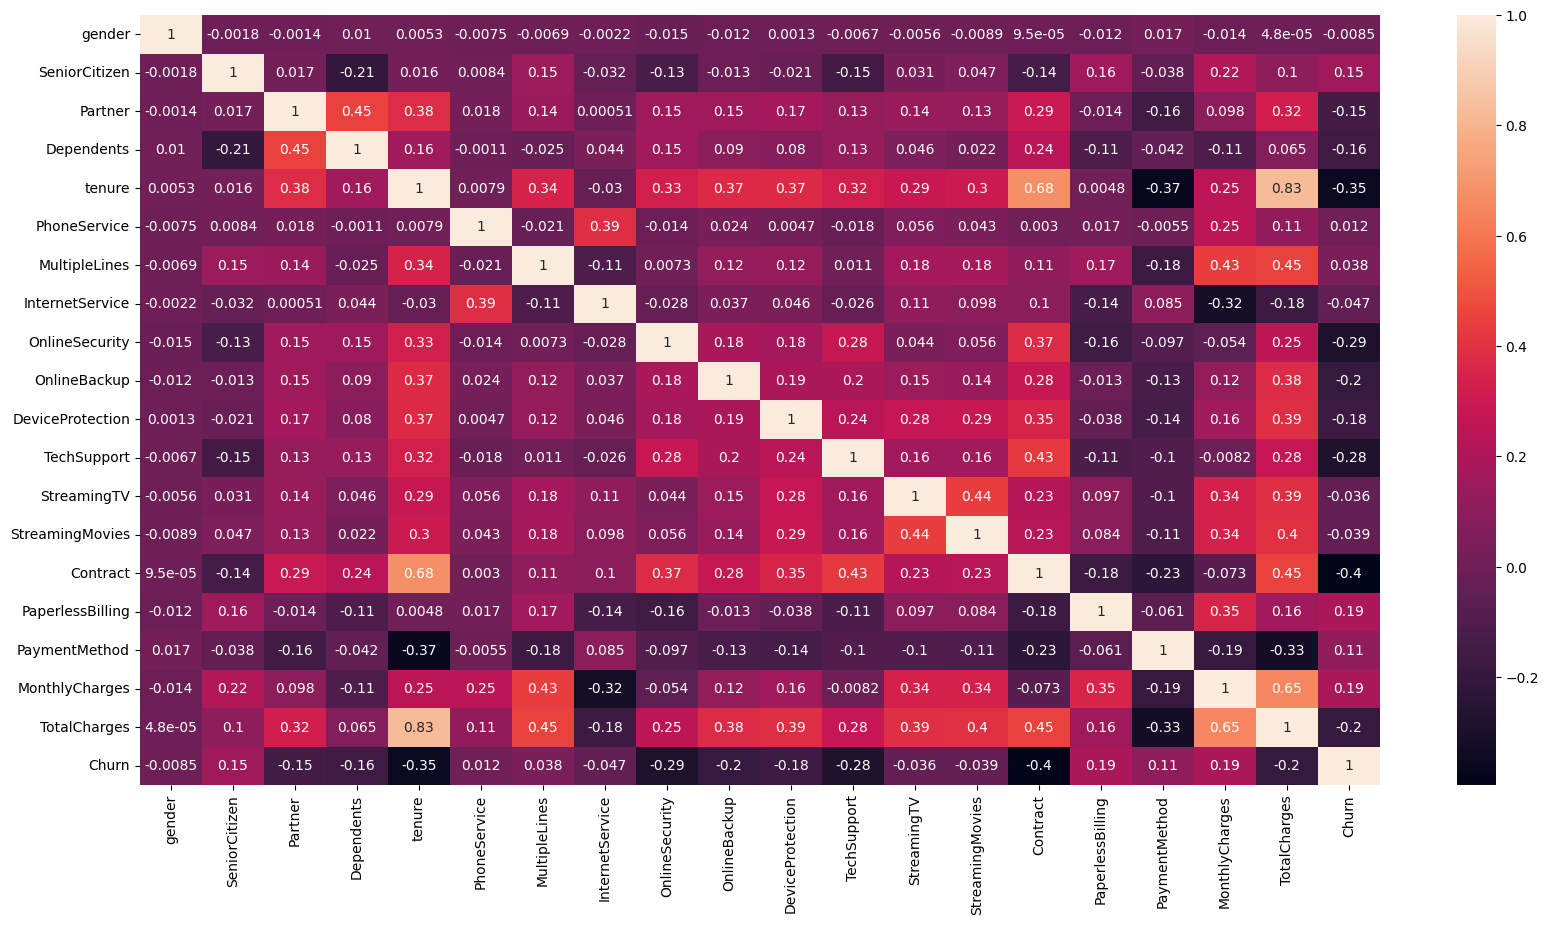

In [29]:
corelation = df.corr()
fig, ax =plt.subplots(figsize=(20,10))
sn.heatmap(corelation , annot = True)

In [30]:
#lets see get a better look at a correlation between churn and Telecom services

In [31]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
services = df[['Churn', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PhoneService']].corr()

<Axes: >

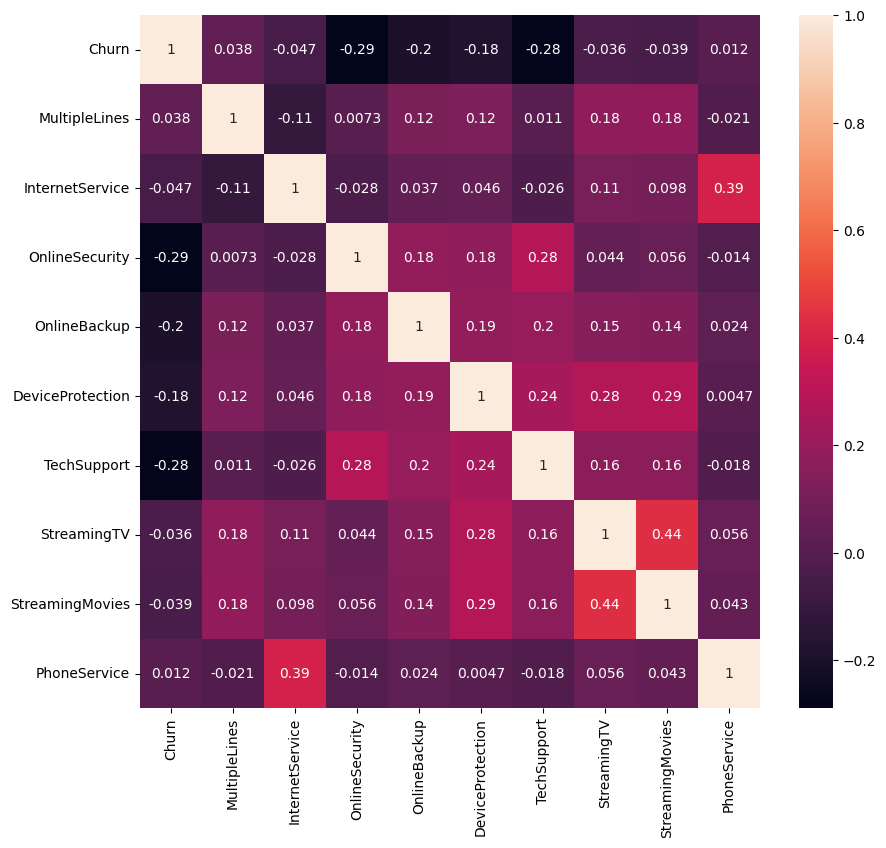

In [33]:
fig,ax=plt.subplots(figsize=(10,9))
sn.heatmap(services , annot = True)

Looking at The correlation matrix with visualizing with heatmap 
* The findings Are
  1) Churn with Multiples lines :-
     There is a weak posivtive correlation of 0.04 having multiple lines and My analysis suggest that having multiple lines is slightly associated with a higher likelyhood of churn.
  2) Churn With Rest of The services:-
     There is weak negative correlation with internet service and strong negatice correaltionn with OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport its suggest that is a lower likelyhood of churn in these areas of features.
There is a weak positive correlation with phone service that is 0.01 

# Data Visualisation 
Now let's visualize the data the and explore more pattern in the dataset with the help of the visualization 
* First we will look at distribution of individual variable and then slice and dice our data for any intresting trend
  1) lets us first understand the gender , patner and dependent state of
     customers
     lest start with GENDER DISTRIBUTION

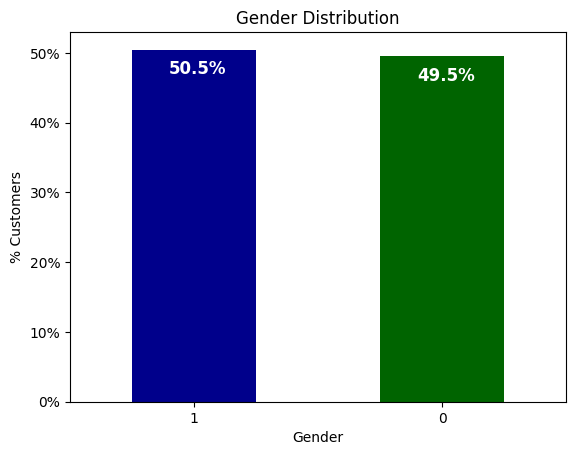

In [34]:
colors =['darkblue','darkgreen'] 
ax = (df['gender'].value_counts()*100.0/len(data)).plot(kind='bar',stacked=True,rot=0,color= colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')
# creating a list to collect plt.patches data
totals=[]

for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15,i.get_height()-3.5,\
           str(round((i.get_height()/total),1))+'%',
           fontsize = 12,
            color = 'white',
           weight = 'bold')

In [76]:
object_col = data.select_dtypes(include=['object']).columns
for col in object_col:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [77]:
# features
x = data[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
   
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']

In [78]:
#spliting the dataset
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print('Training acc',train_accuracy)
print('test acc',test_accuracy)

Training acc 1.0
test acc 0.7341862117981521


In [88]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(x_train, y_train)


RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [90]:
from sklearn import metrics
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8116560056858564


<Axes: >

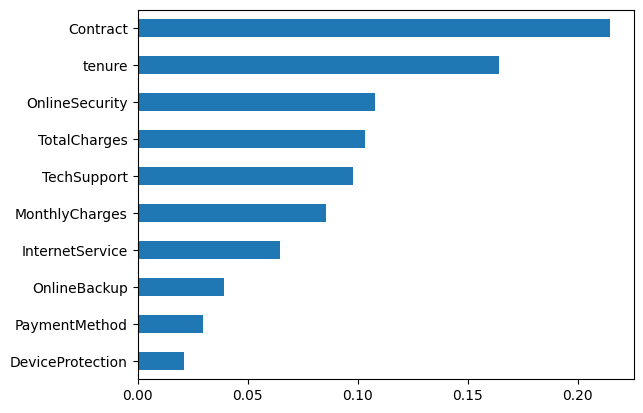

In [92]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')